In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from nltk import word_tokenize,sent_tokenize
import os
print(os.listdir("../input"))
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show,figure
%matplotlib inline
# Any results you write to the current directory are saved as output.

[]


In [4]:
nltk.download('punkt') #tokenizer download


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /usr/share/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [6]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
#step1:- tokenize the text

In [9]:
gberg_sent_tokens=sent_tokenize(gutenberg.raw())

In [10]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [13]:
gberg_sent_tokens[1]  #newline characers there
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [14]:
gberg_sents=gutenberg.sents()

In [19]:
gberg_sents[3]  #sent_tokenize and word_tokenize in noe shot

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 '-',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.']

In [26]:
model=Word2Vec(sentences=gberg_sents,size=64,sg=1,window=10,min_count=5,seed=42,workers=5)

In [27]:
#Explore model
model['dog']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-0.06266289, -0.1304117 ,  0.02839913,  0.18740867, -0.05636922,
        0.02128855,  0.50948364,  0.30948183,  0.32964686, -0.10252076,
       -0.13314112,  0.44086617,  0.32616395,  0.0508519 , -0.00867547,
        0.5233702 ,  0.4700895 , -0.28228298, -0.55979854,  0.07951871,
        0.17578538, -0.34666273, -0.13804972, -0.19186515,  0.20478031,
       -0.04465561,  0.21158843, -0.3703332 , -0.31942916,  0.22792886,
       -0.3720041 , -0.00438656, -0.16082962,  0.16210559, -0.4001512 ,
        0.1276929 ,  0.3513627 , -0.13593367, -0.13897334,  0.1951102 ,
        0.31361973, -0.12229393,  0.43280894, -0.37275246, -0.23356421,
        0.08949924,  0.11653967,  0.35806486, -0.6213428 , -0.3033544 ,
       -0.04447619, -0.5088417 , -0.33055127, -0.41990536,  0.16478178,
        0.1453027 ,  0.59593064, -0.18134376,  0.06331637,  0.27121907,
        0.37449476, -0.24552387, -0.23381762,  0.18492812], dtype=float32)

In [33]:
model.most_similar('dog')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('puppy', 0.8362109065055847),
 ('cage', 0.7723304033279419),
 ('thief', 0.7685309648513794),
 ('sweeper', 0.7622615694999695),
 ('pet', 0.7560021877288818),
 ('shell', 0.7530606389045715),
 ('pig', 0.7449123859405518),
 ('broth', 0.7432032823562622),
 ('string', 0.7428209781646729),
 ('chimney', 0.7334334850311279)]

In [35]:
model.doesnt_match("mother father son daughter uncle dog".split())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/opt/conda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'dog'

In [36]:
model.most_similar(positive=['father','woman'],negative=['man'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mother', 0.7899733185768127),
 ('sister', 0.7882150411605835),
 ('wife', 0.7623646259307861),
 ('daughter', 0.7538303136825562),
 ('husband', 0.7396669983863831),
 ('brother', 0.721187949180603),
 ('Sarah', 0.7197089195251465),
 ('Sarai', 0.707822322845459),
 ('Rachel', 0.6980788707733154),
 ('Amnon', 0.6975378394126892)]

In [37]:
 #Reduce word Vector dimensionality using t-SNE

In [38]:
len(model.wv.vocab)

17011

In [44]:
X=model[model.wv.vocab]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [48]:
tsne=TSNE(n_components=2,n_iter=300)

In [49]:
x_2d=tsne.fit_transform(X)

In [51]:
x_2d.shape

(17011, 2)

In [52]:
coords_df=pd.DataFrame(x_2d,columns=['x','y'])
coords_df['token']=model.wv.vocab.keys()

In [53]:
coords_df.head()

,x,y,token
0,-6.401119,3.819815,[
1,-3.979912,6.593587,Emma
2,-4.863349,-1.523861,by
3,-4.427886,6.333186,Jane
4,-6.400768,3.825392,]


In [54]:
##Visualize

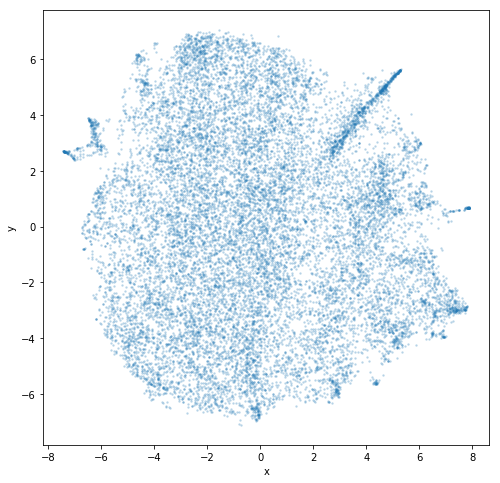

In [57]:
_=coords_df.plot.scatter('x','y',figsize=(8,8),marker='.',s=10,alpha=0.2)

In [58]:
output_notebook()

Loading BokehJS ...

In [59]:
subdet_df=coords_df.sample(n=5000)

In [61]:
p=figure(plot_width=600,plot_height=600)
_=p.text(x=subdet_df.x,y=subdet_df.y,text=subdet_df.token)

In [62]:
show(p)